In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
df_aless = pd.read_csv('./dados/amazon.tsv',sep = '\t')

In [3]:
df_aless.head()
#Feedback => 1 (gostou) 0(não gostou)
#Ratings => 1,2,3,4,5... são as notas

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_aless.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [5]:
# Adicionar quem deu feedback ruim 
ruim = [linha for linha in df_aless['feedback']  if linha == 0]
# Adicionar quem deu feeback bom
bom = [linha for linha in df_aless['feedback']  if linha == 1]

#porcentagem de bom e ruim
len(bom)/(len(df_aless['feedback'])),len(ruim)/(len(df_aless['feedback']))

#91% classficiaram como BOM
#8% classificaram como Ruim

(0.9184126984126985, 0.08158730158730158)

In [6]:
"""for linha in df_aless['feedback']:
    if linha== 0:
        print('oi')"""
#Teste..

"for linha in df_aless['feedback']:\n    if linha== 0:\n        print('oi')"

### Começa aqui, vamos trabalhar com a coluna "verified_reviews"

In [7]:
# Aqui estão os textos que queremos analisar
df_aless['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [8]:
#Exemplo
df_aless['verified_reviews'][0],df_aless['verified_reviews'][1]

('Love my Echo!', 'Loved it!')

In [9]:
positive = df_aless[df_aless['feedback'] == 1]
positive.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
negative = df_aless[df_aless['feedback'] == 0]
negative.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


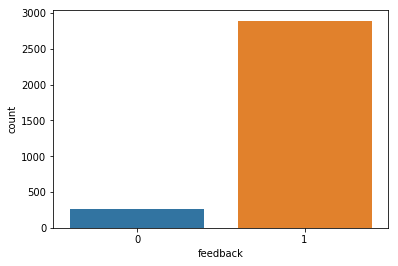

In [11]:
sns.countplot(df_aless['feedback'], label = 'Counts')

Temos uma base de dados bem desbalanceada... isso dificulta para fazer previsões

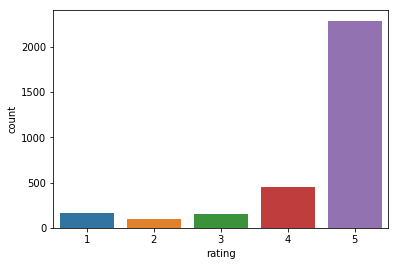

In [12]:

# Ratings = NOTAS


sns.countplot(x = 'rating', data = df_aless)

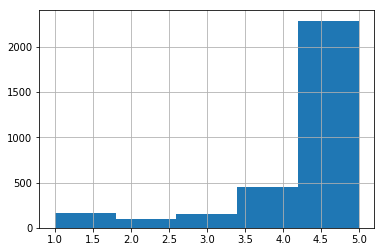

In [13]:
df_aless['rating'].hist(bins = 5)

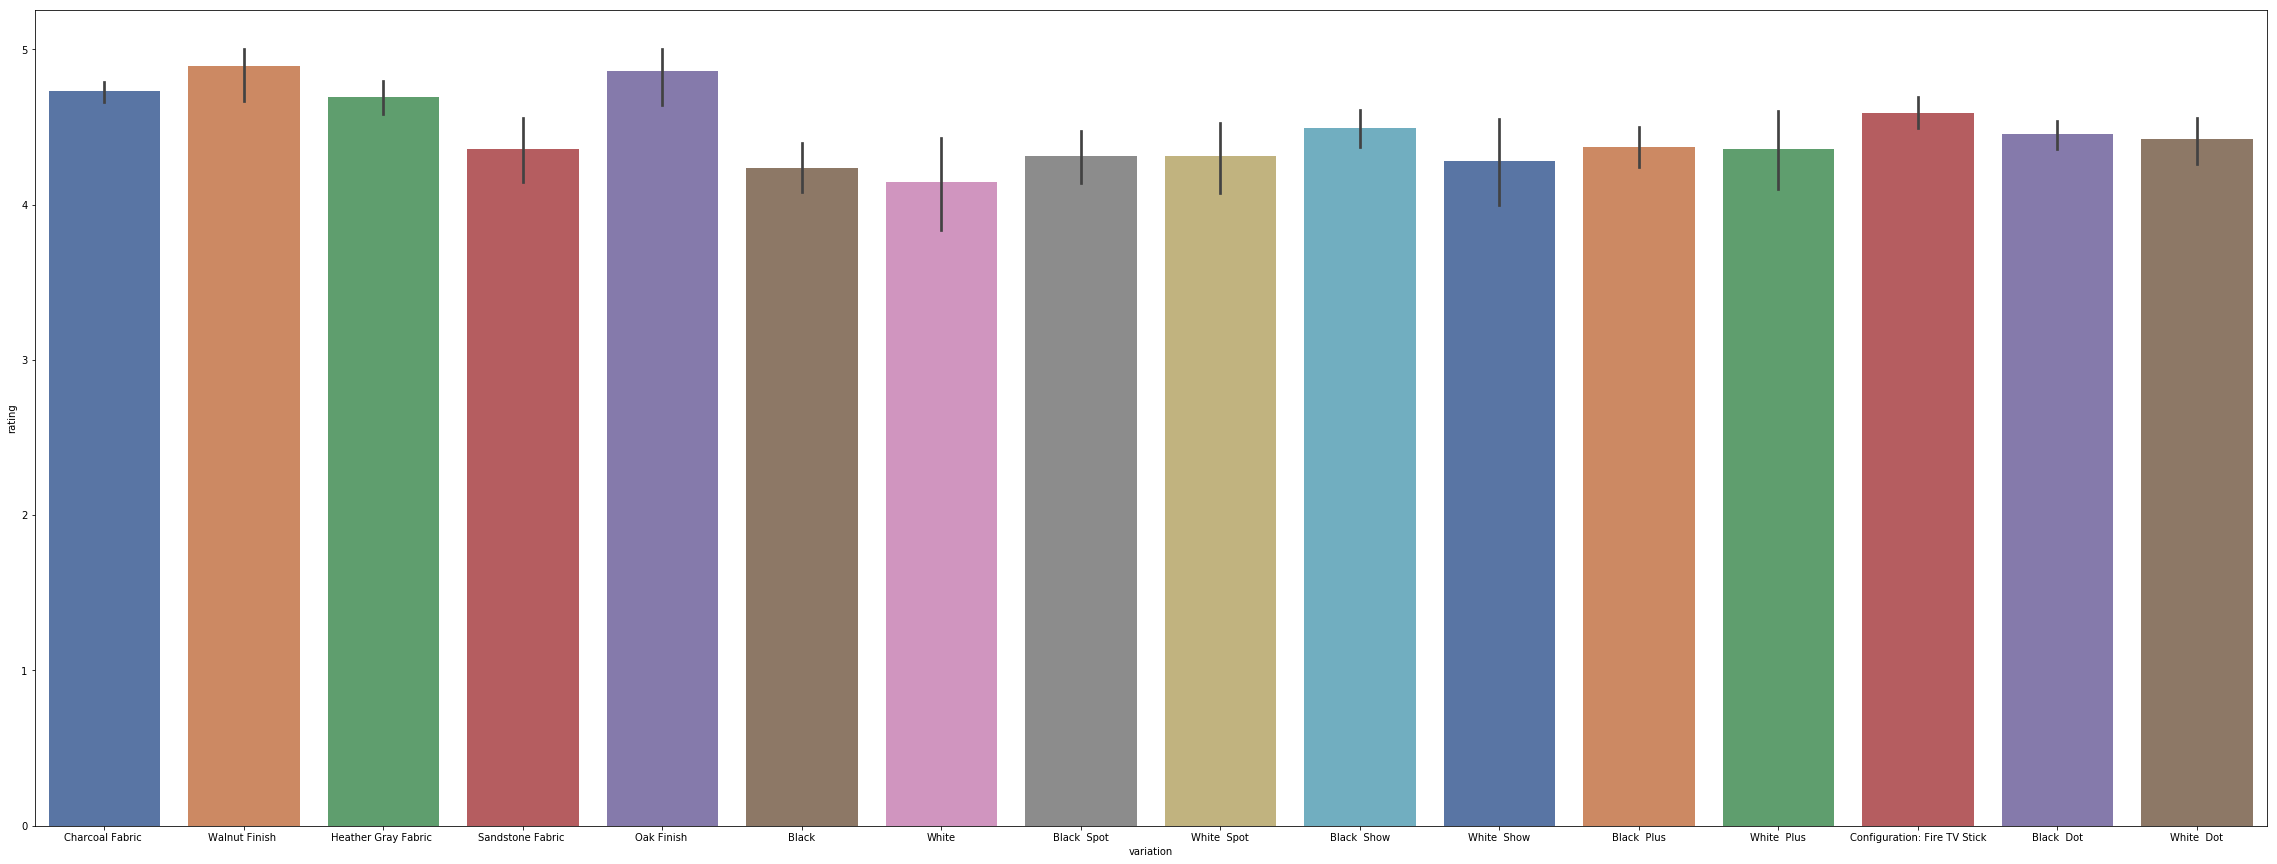

In [14]:
plt.figure(figsize = (40,15))
sns.barplot(x='variation', y = 'rating',
           data = df_aless, palette='deep')

#### Limpeza dos Dados

In [15]:
df_aless = df_aless.drop(['date','rating'],axis=1)

In [16]:
df_aless.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [17]:
variation_dummies = pd.get_dummies(df_aless['variation'])

In [18]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
df_aless.drop('variation',axis=1,inplace = True)

In [20]:
df_aless.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [21]:
df_aless = pd.concat([df_aless,variation_dummies],axis=1)
#Concatenamos 2 tabelas

In [22]:
df_aless.head()

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Tokenização

Precisamos trabalhar com números nessas palavras em VERIFIED_REVIEWS.... temos que transformar em número

#### Exemplo - Tokenização

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
teste = ['hello world, hello again',
         'Hello, caneta azul e vermelha, hello again',
         'hello, este é o primeiro documento e aquele é o segundo documento']

In [25]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(teste)

In [26]:
print(vectorize.get_feature_names())
#Note que a palavra Hello está em todos os índices... e em difernetes formas, com Vírgula na frente e Maisculo...
#Msm assim ele reconhece como 'hello'

['again', 'aquele', 'azul', 'caneta', 'documento', 'este', 'hello', 'primeiro', 'segundo', 'vermelha', 'world']


In [27]:
print(X.toarray())

[[1 0 0 0 0 0 2 0 0 0 1]
 [1 0 1 1 0 0 2 0 0 1 0]
 [0 1 0 0 2 1 1 1 1 0 0]]


#### ----------- Fim do Exemplo -------------

In [28]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_aless['verified_reviews'])

In [29]:
alexa_countvectorizer.shape
#temos mais colunas que linha... ou seja, muita palavra

(3150, 4044)

In [30]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [31]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [32]:
print(alexa_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
df_aless.drop(['verified_reviews'], axis = 1, inplace = True)

In [34]:
df_aless.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [35]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [36]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_aless = pd.concat([df_aless,reviews], axis =1)

In [38]:
df_aless.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Retirar a coluna Feedback, pois para treinar o modelo você tem que deixar um valor na classe (Y)
# e outra com os atributos previsore (X)

In [40]:
X = df_aless.drop(['feedback'],axis = 1)

In [41]:
y = df_aless['feedback']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [43]:
X_train.shape,X_test.shape

((2520, 4060), (630, 4060))

In [44]:
y_train.shape,y_test.shape

((2520,), (630,))

### Construção de Treinamento do Modelo

In [1]:
classifier = tf.keras.models.Sequential()

#Camada de Entrada
classifier.add(tf.keras.layers.Dense(
    units=400,
    activation = "relu",
    input_shape = (X_train.shape[1],)#4060
    )
)

#Camada Oculta
classifier.add(tf.keras.layers.Dense(
    units=400,
    activation = "relu",
    )
)

#Camada de Saída
classifier.add(tf.keras.layers.Dense(
    units=1,
    activation = "sigmoid",#Vai retornar uma probabilidade... 0 até 1, quanto mais próximo de 1 o texto é positivo
    # quanto mais próximo de 0 o texto é negativo
    )
)

classifier.summary()

NameError: name 'tf' is not defined

In [ ]:
classifier.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = classifier.fit(
    X_train,
    y_train,
    epochs= 20,
    validation_split= 0.1,# Ele irá pegar 20% dos dados da base de treinamento e fazer uma validação
)

### Avaliação do Modelo na base de teste

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
#Estamos no treinamento ainda
y_pred_train = classifier.predict(X_train)
y_pred_train

array([[1.        ],
       [0.99999976],
       [1.        ],
       ...,
       [1.        ],
       [0.9999682 ],
       [0.99999785]], dtype=float32)

In [50]:
y_pred_train = (y_pred_train > 0.5) # maior que 0.5 True, menor False
y_pred_train

y_train_vf = (y_train > 0.5)

#Transformei tudo em verdadeiro Falso

In [51]:
cm = confusion_matrix(y_train_vf,y_pred_train)
cm

array([[ 173,   25],
       [   0, 2322]])

Classe negativa => 182 classificado corretamente e 12 errado
Classe positiva => 2321 classificados corretamente e 1 errados

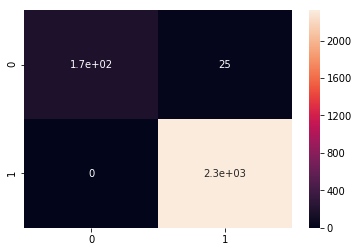

In [52]:
sns.heatmap(cm,annot = True)

In [53]:
# Agora pro Test

In [54]:
y_pred_test = classifier.predict(X_test)

y_pred_test = (y_pred_test > 0.5) 
y_pred_test

y_test_vf = (y_test > 0.5)

cm = confusion_matrix(y_test_vf,y_pred_test)
cm

array([[ 13,  46],
       [  4, 567]])

Classe negativa => 16 classificado corretamente e 43 errado

Classe positiva => 565 classificados corretamente e 6 errados

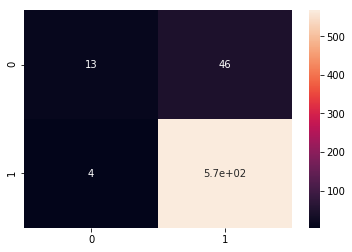

In [55]:
sns.heatmap(cm,annot = True)

In [56]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

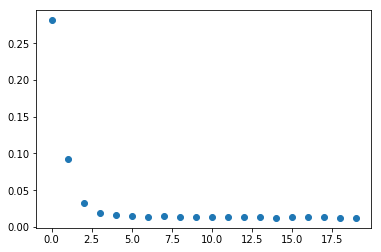

In [57]:
plt.plot(history.history['loss'],'o')


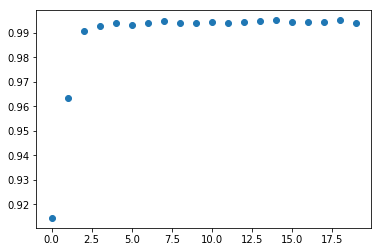

In [58]:
plt.plot(history.history['accuracy'],'o')

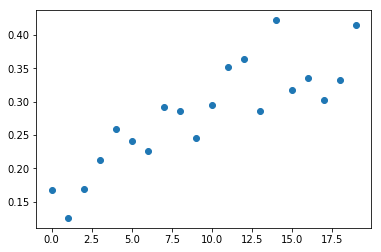

In [59]:
plt.plot(history.history['val_loss'],'o')

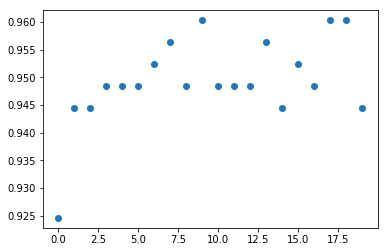

In [60]:
plt.plot(history.history['val_accuracy'],'o')